In [113]:
#Hecho por Megan Bougle
#Dataset de Titanic recuperado de https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

#Se carga el data set desde un repositorio de GitHub 
url='https://raw.githubusercontent.com/meganbougle/TitanicDataSet/main/titanic.csv'
df= pd.read_csv(url)
#Se verifica que  se haya cargado correctamente mediante un print de las primeras columnas del data set
print(df.head())



   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


In [114]:
#Tamanio del dataset y valores estadisticos de cada columna
print(df.shape)
print(df.describe())

(887, 8)
         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                   0.000000   31.13750  
max     

In [115]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
None


In [116]:
#Se revisa si hay valores faltantes en las columnas
#Vemos que no existe ninguna asi que no hay necesidad de llenar valores faltantes
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [117]:
#Estadisticas descriptivas para las columnas numericas: edad y tarifa del pasaje
media=df[['Age','Fare']].mean()
mediana=df[['Age','Fare']].median()
#el iloc es para que solo se extraiga la primera moda porque pueden haber mas de una aveces
moda=df[['Age','Fare']].mode().iloc[0]
std=df[['Age','Fare']].std()
EstadisticasDesc=pd.DataFrame({'Media':media,'Mediana':mediana,'Moda':moda,'Desviacion Estandar':std})
print(EstadisticasDesc)

          Media  Mediana   Moda  Desviacion Estandar
Age   29.471443  28.0000  22.00            14.121908
Fare  32.305420  14.4542   8.05            49.782040


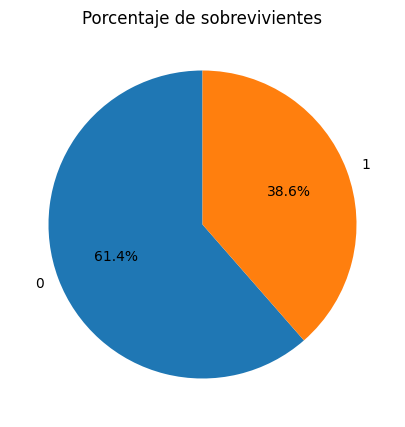

In [118]:
contarSob=df['Survived'].value_counts()
tasaSup=df['Survived'].mean()
plt.figure(figsize=(10,5))
plt.pie(contarSob.values, labels=contarSob.index, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de sobrevivientes')
plt.show()

In [119]:
#He notado que la columna edad tiene varios valores (es normal) pero, para facilitar el analisis decidi agruparlas en rangos de edades
bins = [0, 18, 35, 50, 80]
labels = ['0-18', '19-35', '36-50', '50+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

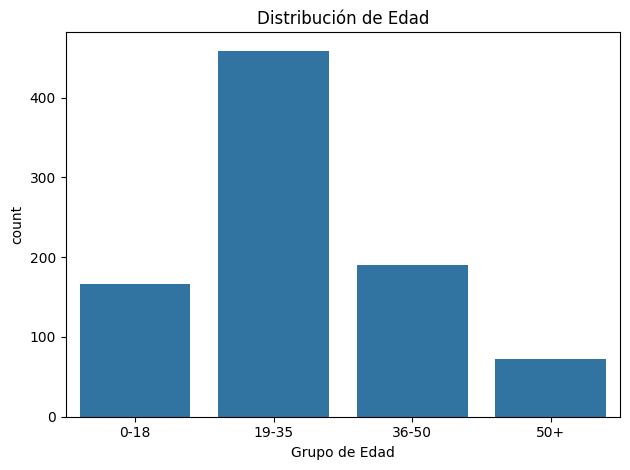

In [120]:

# Grafico de barras de la Edad utilizandi el grupo de edad previamente creado
figsize=(14, 5)
sns.countplot(x='AgeGroup', data=df)
plt.title('Distribución de Edad')
plt.xlabel('Grupo de Edad')
plt.tight_layout()
plt.show()

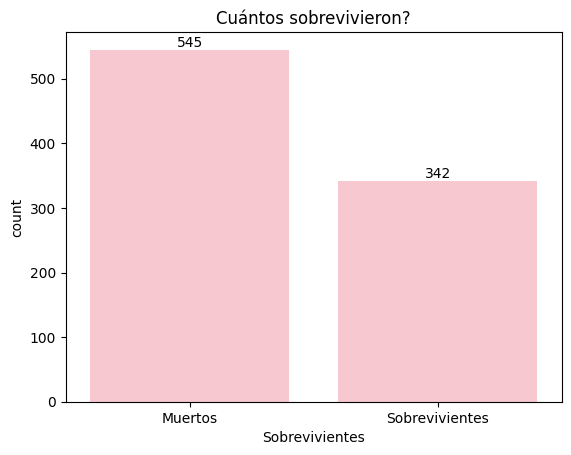

In [121]:
df['sobrevivientesLb'] = df['Survived'].replace({0: 'Muertos', 1: 'Sobrevivientes'})
contarSv=sns.countplot(x='sobrevivientesLb', data=df, color='pink')
for container in contarSv.containers:
    contarSv.bar_label(container)
plt.title('Cuántos sobrevivieron?')
contarSv.set_xlabel('Sobrevivientes')
plt.show()


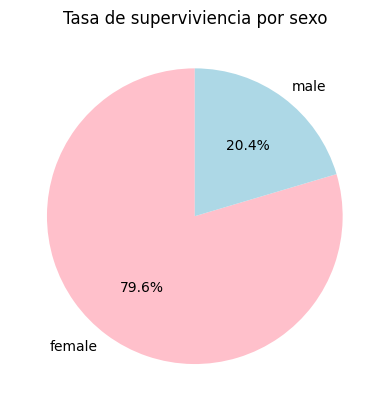

C:\Users\Megan\AppData\Local\Temp\ipykernel_21128\1114508939.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  porcentEdad=df.groupby('AgeGroup')['Survived'].mean()*100


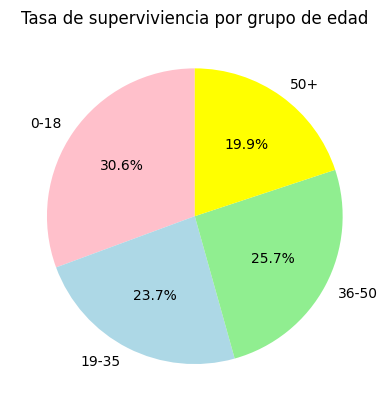

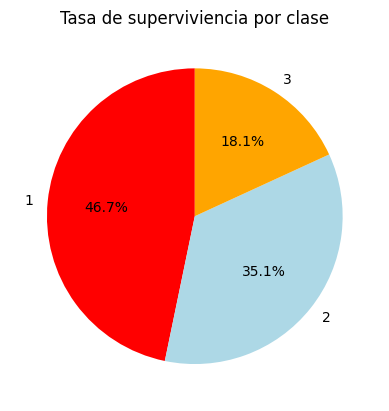

In [122]:
#tasas de supervivencia por sexo, grupo de edad y clase. Para esto se calcula la mdia de la columna correspondiente y posteriormente se realiza un grafico de pastel para lograr visualizar los resultados.
porcentSexo=df.groupby('Sex')['Survived'].mean()*100
figsize=(14, 5)
plt.pie(porcentSexo.values, labels=porcentSexo.index, autopct='%1.1f%%', startangle=90, colors=['pink','lightblue'])
plt.title('Tasa de superviviencia por sexo')
plt.show()
porcentEdad=df.groupby('AgeGroup')['Survived'].mean()*100
plt.pie(porcentEdad.values, labels=porcentEdad.index, autopct='%1.1f%%', startangle=90, colors=['pink','lightblue','lightgreen','yellow'])
plt.title('Tasa de superviviencia por grupo de edad')
plt.show()
porcentClase=df.groupby('Pclass')['Survived'].mean()*100
plt.pie(porcentClase.values, labels=porcentClase.index, autopct='%1.1f%%', startangle=90, colors=['red','lightblue','orange'])
plt.title('Tasa de superviviencia por clase')
plt.show()

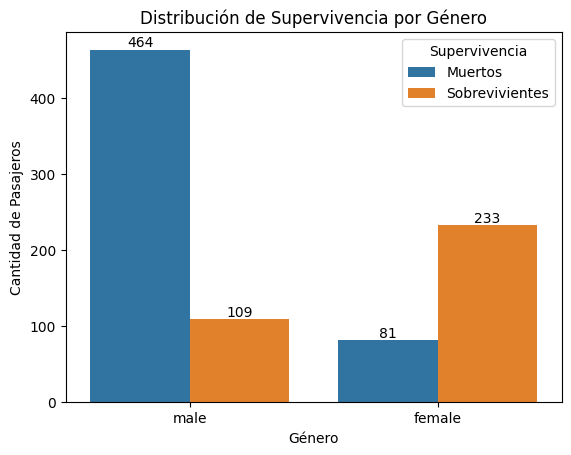

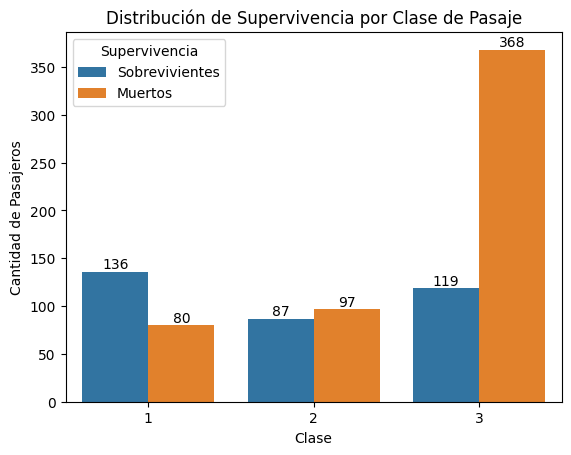

In [123]:
#Distribuciones para ver la cantidad de sobrevivientes y muertos por genero  y clase de pasaje, esto permite tener una mejor comprension de los datos
contarSexo=sns.countplot(x='Sex', hue='sobrevivientesLb', data=df)
plt.title('Distribución de Supervivencia por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Supervivencia')
for container in contarSexo.containers:
    contarSexo.bar_label(container)
plt.show()

contarClase=sns.countplot(x='Pclass', hue='sobrevivientesLb', data=df)
plt.title('Distribución de Supervivencia por Clase de Pasaje')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Supervivencia')
for container in contarClase.containers:
    contarClase.bar_label(container)
plt.show()



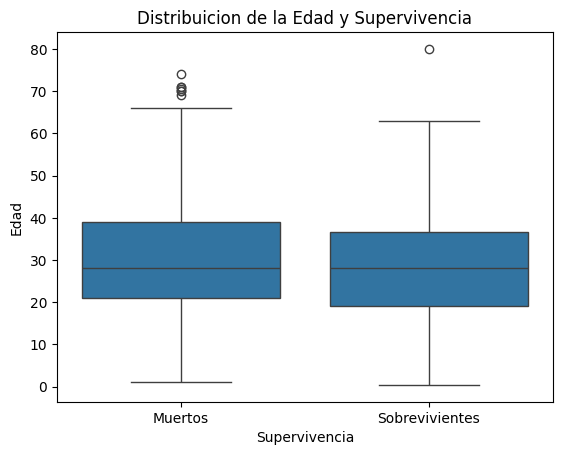

In [124]:
sns.boxplot(x='sobrevivientesLb', y='Age', data=df)
plt.title('Distribuicion de la Edad y Supervivencia')
plt.xlabel('Supervivencia')
plt.ylabel('Edad')
plt.show()
#En este grafico de cajas se puede observar que la edad de los sobrevivientes es menor a la de los muertos y hay algunos outliers en ambos casos

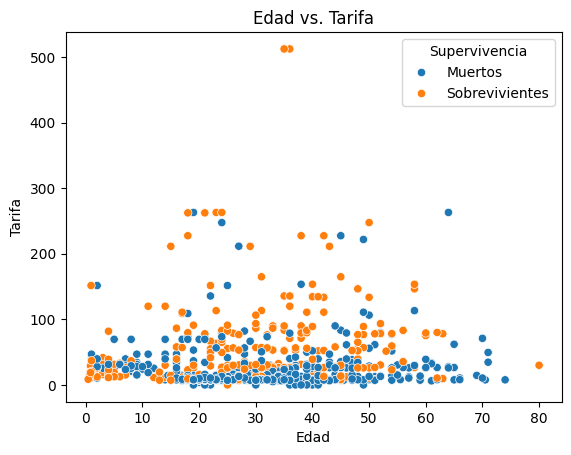

In [125]:
#Intentado entender la relacion entre la edad y la tariafa del pasaje
sns.scatterplot(x='Age', y='Fare', hue='sobrevivientesLb', data=df)
plt.title('Edad vs. Tarifa')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.legend(title='Supervivencia')
plt.show()

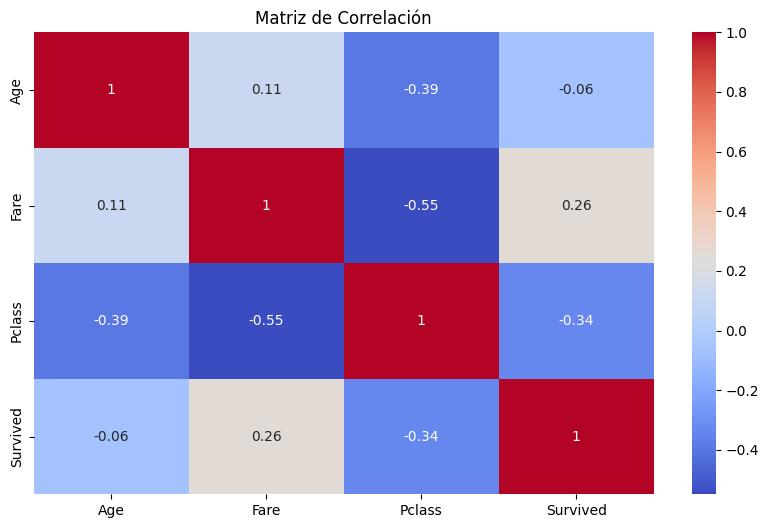

In [126]:
#Decidi agrupar todas las columnas numericas relevantes para lograr analizar la relacion entre ellas mediante una matriz de correlacion
vnum=df[['Age','Fare','Pclass','Survived']]
correlation_matrix = vnum.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()